# Complex exponentials
```{eval-rst}
.. index:: complex number; exponential
```

In [1]:
%run ../setup.ipynb

Recall the definition of the exponential function as an infinite summation:
```{margin}
If you need a refresher on exponentials, see the [appendix](exponentials).
```
```{math}
e^x = \sum_{n=0}^{\infty} \frac{x^n}{n!}
```

We normally think of this definition in terms of real-valued $x$, but the idea carries over to *complex* exponentials $e^z$ for $z \in \mathbb{C}$ using exactly the same formula with $z$ in place of $x$.

Because any complex $z$ is the sum of its real and imaginary parts, it can be helpful to separate the exponential using the product rule:

```{math}
e^z = e^{a + \mathrm{j}b} = e^a \cdot e^{\mathrm{j}b}
```

Since $a$ is real, we already have a good handle on how $e^a$ behaves.
Let's focus on what happens just to that second factor, where the quantity in the exponent is purely imaginary: $e^{\mathrm{j}b}$.

{numref}`euler-partial` shows what happens as we form better approximations to $e^{\mathrm{j}b}$ by including more terms in the summation.

<Figure size 576x432 with 10 Axes>

<Figure size 576x432 with 10 Axes>

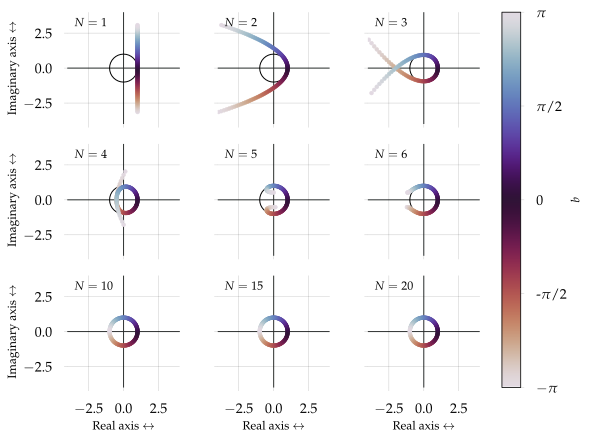

In [35]:
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from scipy.special import factorial

def make_partial_exp(b, N):
    # This function creates all partial sums up to N
    # approximating exp(b)
    n = np.arange(N)
    nf = factorial(n)
    powers = np.power(b, n[:, np.newaxis])
    return np.cumsum(powers / nf[:, np.newaxis], axis=0)

make_partial_exp(np.linspace(-np.pi, np.pi, num=100), 5).shape

fig, axes = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(8, 6))

for ax in axes.flat:
    
    ax.axhline(0, color=colors[3], zorder=-1, linewidth=1)
    ax.axvline(0, color=colors[3], zorder=-1, linewidth=1)
    circ = patches.Ellipse((0, 0), 2, 2, edgecolor='k', linewidth=1, fill=False, zorder=-1)
    ax.add_artist(circ)

    ax.set_xlim([-4, 4])
    ax.set_ylim([-4, 4])
    ax.set_xlabel(r'Real axis $\leftrightarrow$')
    ax.set_ylabel(r'Imaginary axis  $\leftrightarrow$');
    ax.label_outer()
    
b = np.linspace(-np.pi, np.pi, num=100, endpoint=False)

partials = make_partial_exp(b * 1j, 25)

for i, n in enumerate([1, 2, 3, 4, 5, 6, 10, 15, 20]):
    axes.flat[i].scatter(partials[n].real, partials[n].imag, c=b, cmap='twilight_r', zorder=10, s=15)
    axes.flat[i].text(-3.5, 3, f'$N={n}$', size=12, zorder=25)

cb = fig.colorbar(ScalarMappable(norm=Normalize(-np.pi, np.pi), cmap='twilight_r'),
                  label=r'$b$',
                  ax=axes, 
                  fraction=0.05,
                  ticks=np.pi * np.linspace(-1, 1, num=5, endpoint=True),);

cb.ax.set_yticklabels([r'$-\pi$',r'-$\pi/2$', r'0', r'$\pi/2$', r'$\pi$'])

for ax in axes.flat:
    ax.set_aspect('equal')

glue('euler', fig, display=False)

```{glue:figure} euler
---
name: euler-partial
alt: Illustration of partial sums for Euler's formula
---

Partial summations illustrate how Euler's formula maps imagine numbers $\mathrm{j}b$ to the unit circle in the complex plane.
Each plot illustrates the result of taking the first $N$ terms of the summation $\sum_{n=0}^{N-1} (\mathsf{j}\cdot b)^n / n!$ for values $-\pi \leq b \leq \pi$.
```

## Euler's formula
```{eval-rst}
.. index:: Euler's formula
```
{numref}`euler-partial` shows that $e^{\mathrm{j}b}$ wraps imaginary numbers around the unit circle in the complex plane.
By visual inspection, one can see that the point $b=0$ maps to $z=1 + 0\mathrm{j}=1$, which makes sense since $e^0 = 1$.
More surprising are the points  $b=\pm\pi$, which both map to $z=-1$.

This phenomenon is summarized succinctly by **Euler's formula**:

````{admonition} Euler's formula
:class: important

Let $\theta \in \mathbb{R}$ denote any angle (in radians).  Then the *complex exponential* $e^{\mathrm{j}\theta}$ is equal to a complex number with real and imaginary parts given as follows:

```{math}
:label: euler

e^{\mathrm{j}\theta} = \red{\cos(\theta)} + \mathrm{j}\cdot\purple{\sin(\theta)}.
```
````

In plain language, this formula says that if you take the exponential of a purely imaginary number, the result will be a complex number at unit distance from the origin, and with an angle matching the number.

**This is probably the most important formula in all of signal processing.**

## Polar and rectangular form
```{eval-rst}
.. index:: complex number; polar form, complex number; rectangular form
```
Euler's formula says what happens when you take the exponential of an imaginary number.
This might seem like an odd thing to do, but let's take a step back to think about what this tells about exponentials of *complex* numbers $z = a + \mathrm{j}b$.

Remember that $e^z = e^{a + \mathrm{j}b} = e^a \cdot e^{\mathrm{j}b}$.
Using Euler's formula, we can write this as

\begin{align*}
e^z = e^a \cdot e^{\mathrm{j}b} &= e^a \cdot \left(\red{\cos(b)} + \mathrm{j}\cdot\purple{\sin(b)}\right)\\
&= e^a \cdot \red{\cos(b)} + e^a \cdot\mathrm{j}\cdot\purple{\sin(b)}.
\end{align*}

**What does this buy us?**

Imagine picking any complex number $z = \red{a} + \mathrm{j}\purple{b}$.
As we've seen earlier, this number can be represented by the point $(a, b)$ in the complex plane.
Equivalently, we can represent $z$ in **polar** form in terms of its distance from the origin (which we call $r$) and the angle $\theta$ it makes with the real axis.

<Figure size 432x324 with 1 Axes>

<Figure size 432x324 with 1 Axes>

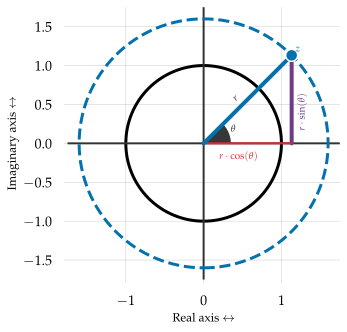

In [5]:
# Plot a circle, inscribed right triangle, angle, and sine and cosine markers
fig, ax = plt.subplots(figsize=figaspect(0.75))

r = 1.6
angle = np.pi / 4
x, y = r * np.cos(angle), r * np.sin(angle)

ucirc = patches.Ellipse((0, 0), 2, 2 , edgecolor='k', linewidth=3, fill=False, zorder=-1)
circ = patches.Ellipse((0, 0), 2 * r, 2 * r, edgecolor=colors[0], linewidth=3, linestyle='--', fill=False)

ax.text(1.2, 0.2, r'$r\cdot\sin(\theta)$', color=colors[4], rotation=90)
ax.plot([x, x], [0, y], linewidth=4, color=colors[4])

ax.text(0.2, -0.2, r'$r\cdot\cos(\theta)$', color=colors[1])
ax.plot([0, x], [0, 0], color=colors[1])

ax.text(0.35, 0.55, r'$r$', color=colors[3], rotation=angle * 180 / np.pi)
ax.plot([0, x], [0, y], marker='o', markersize=12, linewidth=4, markevery=[-1])

ax.text(x + 0.05, y + 0.05, r'$z$', color=colors[0])

arc = patches.Wedge((0, 0), 0.35, theta1=0, theta2=angle * 180 / np.pi, facecolor=colors[3])
ax.text(0.35, 0.15, r'$\theta$', color=colors[3])

ax.add_patch(ucirc)
ax.add_patch(circ)
ax.add_patch(arc)

ax.axhline(0, color=colors[3], zorder=-1, linewidth=2)
ax.axvline(0, color=colors[3], zorder=-1, linewidth=2)

ax.set_xlim([-1.75, 1.75])
ax.set_ylim([-1.75, 1.75]);
ax.set_aspect('equal')
ax.set_xlabel(r'Real axis $\leftrightarrow$')
ax.set_ylabel(r'Imaginary axis  $\leftrightarrow$');
glue('polar', fig, display=False)

```{glue:figure} polar
A complex number $z$ can be expressed in polar form by finding its distance $r$ from the origin, and the angle $\theta$ it makes with the real number line.
```

Putting this picture back into equations, *any complex number* $z$ can be equivalently expressed using Euler's formula as

\begin{align*}
z &= r \cdot \left(\red{\cos(\theta)} + \mathrm{j}\cdot\purple{\sin(\theta)} \right)\\
  &= r \cdot e^{\mathrm{j}\theta}
\end{align*}

for some radius $r\geq 0$ and angle $\theta$.  This is what we mean by the **polar form** of a complex number.
The radius $r$ of the circle is also called the **magnitude** of the complex number; the angle $\theta$ is called either the **angle** or the **phase** of the number.

If we're given a complex number in polar form (that is, we're given $(r,\theta)$), Euler's formula tells us how to convert it to rectangular form:

\begin{align*}
\red{a} &= \red{r\cdot \cos(\theta)}\\
\purple{b} &= \purple{r\cdot \sin(\theta)}.
\end{align*}

If instead, we're given a complex number in rectangular form (in terms of $(a, b)$), we can convert to polar form by using the Pythagorean theorem to find
the radius, and some geometry to find the angle:

\begin{align*}
r^2 &= \red{a^2} + \purple{b^2} \quad &\Rightarrow r &= \sqrt{\red{a^2} + \purple{b^2}}\\
\tan(\theta) &
= \frac{\purple{\sin(\theta)}}{\red{\cos(\theta)}}
= \frac{\purple{r\cdot \sin(\theta)}}{\red{r \cdot \cos(\theta)}} 
= \frac{\purple{b}}{\red{a}}
\quad &\Rightarrow \theta &= \tan^{-1}\left(\frac{\purple{b}}{\red{a}}\right).
\end{align*}

where $\tan^{-1}$ is the inverse or *arc-tangent* function.

````{admonition} Computing angles in practice
:class: tip

In practice, you shouldn't compute the angle using the arc tangent directly.
This is because dividing $b/a$ can be numerically unstable when $a$ is a small number.

```{code-block}
# Don't do this.
np.arctan(1.0/0.0)
```


Instead, most mathematical software libraries give you functions to compute the inverse tanget without having to do the division first.


```{code-block}
# Do this instead
np.arctan2(1.0, 0.0)
```


You can do even better by using the `numpy` functions to extract magnitude and angle from a complex number:


```{code-block}
np.abs(0+1j)
np.angle(0+1j)
```
````

## Summary
The key point here is that it's always possible to represent a complex number in either polar or rectangular form.
Rectangular form is convenient when adding or subtracting complex numbers.
As we'll see next, polar form is more convenient for multiplying and dividing.